# Resultados

Vuelco algunos de los resultados obtenidos para el analisis de modelos de scattering en volumen utilizando autoencoders convolucionales.

Levantamos los datos en formato pkl.

In [1]:
import os
import pickle

rootdir = os.getcwd()
files_paths = [paths for paths in os.listdir(rootdir) if paths.endswith('.pkl')]

cost = {}
for path in files_paths:
    with open(path, 'rb') as f:
       cost[' '.join(path.split('.')[0].split('_')[1:])] = pickle.load(f)

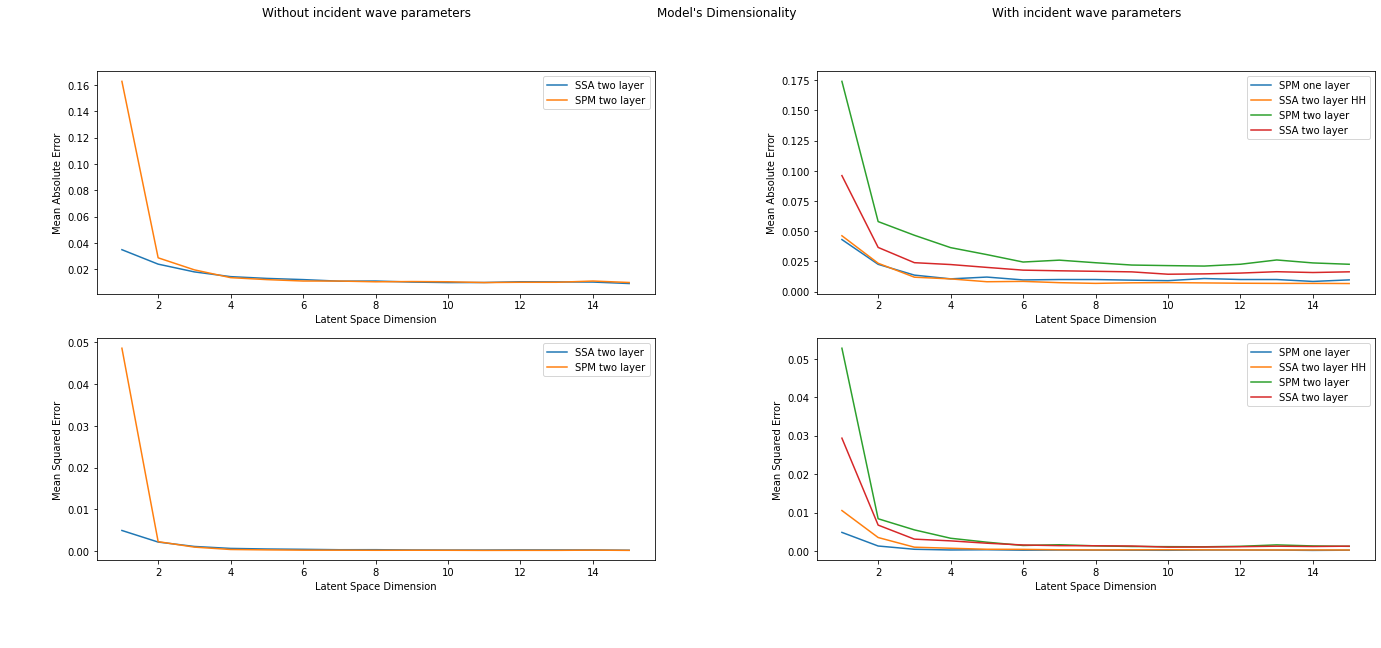

In [10]:
from matplotlib import pyplot as plt

def cost_plot(cost_function, ax, **kwargs):
    # Generate plot
    xlim = len(cost_function) + 1
    plot = ax.plot(range(1, xlim ), cost_function, 
                   label = kwargs.get('label', None))

    # Axes labels
    ax.set_xlabel('Latent Space Dimension') 
    ax.set_ylabel(kwargs.get('ylabel', None))
    ax.set_title(kwargs.get('title', None))
    ax.legend()

    return plot

# Generates figure
fig = plt.figure(figsize=(20,9))
fig.suptitle('Model\'s Dimensionality')

# Divides figure in subfigures for diferent amount of parameters
sub_fig = fig.subfigures(1, 2)
left_ax = sub_fig[0].subplots(2, 1)
right_ax = sub_fig[1].subplots(2, 1)
sub_fig[0].suptitle('Without incident wave parameters')
sub_fig[1].suptitle('With incident wave parameters')

# Plot Cost functions for different metrics
for key in cost.keys():
    if 'ngi' in key:
        image_mae = cost[key]['MAE'][1]
        image_mse = cost[key]['MSE'][1]
        cost_plot(image_mae, left_ax[0], label = key[:-4], 
                  ylabel = 'Mean Absolute Error')
        cost_plot(image_mse, left_ax[1], label = key[:-4],
                  ylabel = 'Mean Squared Error')
    else:
        image_mae = cost[key]['MAE'][1]
        image_mse = cost[key]['MSE'][1]
        cost_plot(image_mae, right_ax[0], label = key, 
                  ylabel = 'Mean Absolute Error')
        cost_plot(image_mse, right_ax[1], label = key,
                  ylabel = 'Mean Squared Error') 

plt.show()        


In [3]:
fig.__dict__

{'_stale': True,
 'stale_callback': None,
 'figure': <Figure size 1440x648 with 0 Axes>,
 '_transform': None,
 '_transformSet': False,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': None,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_contains': None,
 '_rasterized': False,
 '_agg_filter': None,
 '_mouseover': False,
 '_callbacks': <matplotlib.cbook.CallbackRegistry at 0x7fed322248e0>,
 '_remove_method': None,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 '_suptitle': Text(0.5, 0.98, "Model's Dimensionality"),
 '_supxlabel': None,
 '_supylabel': None,
 '_align_label_groups': {'x': <matplotlib.cbook.Grouper at 0x7fed32224970>,
  'y': <matplotlib.cbook.Grouper at 0x7fedbf2da6d0>},
 '_gridspecs': [],
 '_localaxes': <matplotlib.figure._AxesStack at 0x7fedbf307970>,
 'artists': [],
 'lines': [],
 'patches': [],
 'texts': [Text(0.5, 0.98, "Mode